# Predicting Student Performance and Risk of Failure using Data Analytics and Machine Learning

- Educational institutions generate large volumes of data from student demographics, attendance records, exam results, teacher performance,   extracurricular participation, and disciplinary actions.  
However, most schools fail to leverage this data to:  
•	Identify struggling students early  
•	Improve teaching quality  
•	Optimize resource allocation  
•	Enhance student engagement & retention  
This project focuses on building a data-driven decision-support system using SQL, Power BI, and Python to address these challenges.  

### 1. Importing Libraries & Loading Dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('student_modeling_dataset.csv')

In [3]:
df.head()

,STUDENT_ID,GENDER,GRADE_LEVEL,PARENT_EDUCATION_LEVEL,FAMILY_INCOME,AVERAGE_SCORE,PASS_FAIL_RATE,ATTENDANCE_PERCENT,ACTIVITY_FLAG,ACTIVITY_HOURS,HIGHEST_ACHIEVEMENT,DISCIPLINE_COUNT,DISCIPLINE_SEVERITY,PRIMARY_INCIDENT_TYPE,AVG_TEACHER_RATING,AVG_TEACHER_EXPERIENCE
0,S1000,Male,1,Bachelor,306787,47.38,1,85.54,1.0,5.13,State,2.0,1.0,Bullying,3.9,8.0
1,S1001,Male,12,NaN,759570,60.14,1,85.21,1.0,7.57,State,NaN,NaN,NaN,4.1,24.0
2,S1002,Female,1,NaN,148246,57.86,1,83.90,1.0,6.17,State,1.0,1.0,Bullying,NaN,NaN
3,S1003,Male,9,PhD,77824,49.61,1,85.98,1.0,6.50,School,4.0,2.0,Bullying,NaN,NaN
4,S1004,Female,4,Master,667889,53.03,1,82.69,1.0,7.25,State,3.0,3.0,Bullying,3.5,22.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STUDENT_ID              10000 non-null  object 
 1   GENDER                  10000 non-null  object 
 2   GRADE_LEVEL             10000 non-null  int64  
 3   PARENT_EDUCATION_LEVEL  7976 non-null   object 
 4   FAMILY_INCOME           10000 non-null  int64  
 5   AVERAGE_SCORE           10000 non-null  float64
 6   PASS_FAIL_RATE          10000 non-null  int64  
 7   ATTENDANCE_PERCENT      10000 non-null  float64
 8   ACTIVITY_FLAG           9920 non-null   float64
 9   ACTIVITY_HOURS          9920 non-null   float64
 10  HIGHEST_ACHIEVEMENT     9067 non-null   object 
 11  DISCIPLINE_COUNT        9458 non-null   float64
 12  DISCIPLINE_SEVERITY     9458 non-null   float64
 13  PRIMARY_INCIDENT_TYPE   9458 non-null   object 
 14  AVG_TEACHER_RATING      7710 non-null  

In [5]:
df.isnull().sum()

STUDENT_ID                   0
GENDER                       0
GRADE_LEVEL                  0
PARENT_EDUCATION_LEVEL    2024
FAMILY_INCOME                0
AVERAGE_SCORE                0
PASS_FAIL_RATE               0
ATTENDANCE_PERCENT           0
ACTIVITY_FLAG               80
ACTIVITY_HOURS              80
HIGHEST_ACHIEVEMENT        933
DISCIPLINE_COUNT           542
DISCIPLINE_SEVERITY        542
PRIMARY_INCIDENT_TYPE      542
AVG_TEACHER_RATING        2290
AVG_TEACHER_EXPERIENCE    2290
dtype: int64

In [6]:
df.shape

(10000, 16)

#### Analyzing Null Values

- `PARENT_EDUCATION_LEVEL` - 2024 - Many parents may not be having any proper educational degree
- `ACTIVITY_FLAG` - 80 - It shows zero values for the students who have not been involved in any kind of activities
- `ACTIVITY_HOURS` - 80 - Same as activity flag
- `HIGHEST_ACHIEVEMENT` - 933 - This shows that 933 students have participated in activities but didn't achieve any position at state or national level
- `DISCIPLINE_COUNT` - 542 - This shows students with no disciplinary records
- `DISCIPLINE_SEVERITY` & `PRIMARY_INCIDENT_TYPE` - Same as discipline count
- `AVG_TEACHER_RATING` & `AVG_TEACHER_EXPERIENCE` - Students who never got mapped to classes

Proceeding with filling these null values with **fillna* method or **imputation* strategy

Text(0.5, 1.0, 'Distribution of Average Teacher Rating')

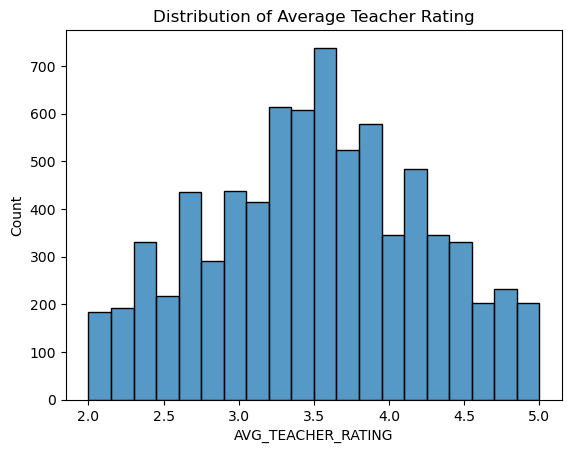

In [7]:
sns.histplot(x='AVG_TEACHER_RATING', data=df, bins=20)
plot.title('Distribution of Average Teacher Rating')

Text(0.5, 1.0, 'Distribution of Average Teacher Experience')

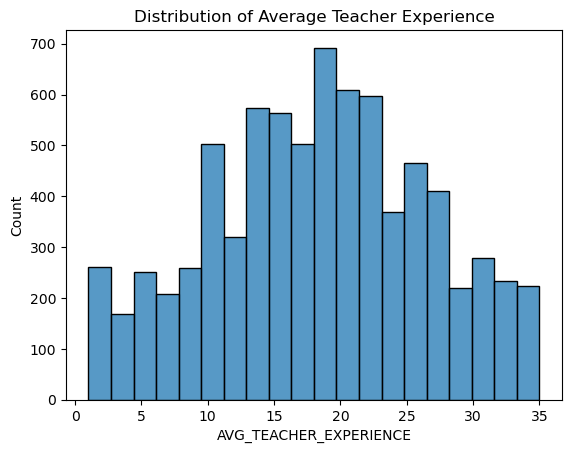

In [8]:
sns.histplot(x='AVG_TEACHER_EXPERIENCE', data=df, bins=20)
plot.title('Distribution of Average Teacher Experience')

In [9]:
df[['AVG_TEACHER_RATING', 'AVG_TEACHER_EXPERIENCE']].describe()

,AVG_TEACHER_RATING,AVG_TEACHER_EXPERIENCE
count,7710.000000,7710.000000
mean,3.492667,18.305127
std,0.717577,8.227419
min,2.000000,1.000000
25%,3.000000,12.500000
50%,3.500000,18.250000
75%,4.000000,24.237500
max,5.000000,35.000000


#### Insights:
- Since, the distribution is appearing normal, we can use either mean or median.
- If the distribution had been skewed, then we would have chosen median to avoid outlier bias.

In [10]:
# filling null values

df['PARENT_EDUCATION_LEVEL'] = df['PARENT_EDUCATION_LEVEL'].fillna('Unknown')

df['ACTIVITY_FLAG'] = df['ACTIVITY_FLAG'].fillna(0)
df['ACTIVITY_HOURS'] = df['ACTIVITY_HOURS'].fillna(0)
df['HIGHEST_ACHIEVEMENT'] = df['HIGHEST_ACHIEVEMENT'].fillna('None')

df['DISCIPLINE_COUNT'] = df['DISCIPLINE_COUNT'].fillna(0)
df['DISCIPLINE_SEVERITY'] = df['DISCIPLINE_SEVERITY'].fillna(0)
df['PRIMARY_INCIDENT_TYPE'] = df['PRIMARY_INCIDENT_TYPE'].fillna('None')

df['AVG_TEACHER_RATING']  =df['AVG_TEACHER_RATING'].fillna(df['AVG_TEACHER_RATING'].median())
df['AVG_TEACHER_EXPERIENCE']  =df['AVG_TEACHER_EXPERIENCE'].fillna(df['AVG_TEACHER_EXPERIENCE'].median())

In [11]:
df.isnull().sum()

STUDENT_ID                0
GENDER                    0
GRADE_LEVEL               0
PARENT_EDUCATION_LEVEL    0
FAMILY_INCOME             0
AVERAGE_SCORE             0
PASS_FAIL_RATE            0
ATTENDANCE_PERCENT        0
ACTIVITY_FLAG             0
ACTIVITY_HOURS            0
HIGHEST_ACHIEVEMENT       0
DISCIPLINE_COUNT          0
DISCIPLINE_SEVERITY       0
PRIMARY_INCIDENT_TYPE     0
AVG_TEACHER_RATING        0
AVG_TEACHER_EXPERIENCE    0
dtype: int64

In [12]:
# Checking class imbalance

df['PASS_FAIL_RATE'].value_counts(normalize=True)*100

PASS_FAIL_RATE
1    98.03
0     1.97
Name: proportion, dtype: float64

#### Insights:
- The dataset appears to be highly imbalanced as we can see everyone almost passes. If we don't fix this, the model will ignore fails.
- We will use SMOTE or class weights and evaluate with precision or recall for fails.

#### Model Building

In [51]:
# Preparing features & target

X = df.drop(columns = ['STUDENT_ID', 'PASS_FAIL_RATE'])

y = df['PASS_FAIL_RATE']

In [52]:
# Encoding categorical columns

categorical_columns = X.select_dtypes(include=['object']).columns
X[categorical_columns] = X[categorical_columns].apply(LabelEncoder().fit_transform)

In [53]:
# Splitting into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
# We will handle class imbalances using two approaches - SMOTE Oversampling and Class Weights

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [55]:
# Random Forest with class weights and no SMOTE

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [56]:
# Random forest with SMOTE & no class weights

rf_smote = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf_smote.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=200, random_state=42)

In [57]:
# XGBoost with class weights

fail_weight = (len(y_train) - sum(y_train))/sum(y_train)

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=fail_weight,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [58]:
# Evaluating the model

def evaluate_model(model, X_test, y_test, model_name='Model'):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None
    
    print(f"\n===== {model_name} =====")
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\nClassification Report:\n', classification_report(y_test, y_pred, digits=4))
    
    if y_proba is not None:
        print('ROC-AUC Score:', roc_auc_score(y_test, y_proba))

In [59]:
# Evaluating Random forest with class weights

evaluate_model(rf, X_test, y_test, 'Random Forest (Class Weights)')


===== Random Forest (Class Weights) =====
Confusion Matrix:
 [[  39    0]
 [   0 1961]]

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        39
           1     1.0000    1.0000    1.0000      1961

    accuracy                         1.0000      2000
   macro avg     1.0000    1.0000    1.0000      2000
weighted avg     1.0000    1.0000    1.0000      2000

ROC-AUC Score: 1.0


In [60]:
# Evaluating Random forest with SMOTE

evaluate_model(rf_smote, X_test, y_test, 'Random Forest (SMOTE)')


===== Random Forest (SMOTE) =====
Confusion Matrix:
 [[  39    0]
 [   0 1961]]

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        39
           1     1.0000    1.0000    1.0000      1961

    accuracy                         1.0000      2000
   macro avg     1.0000    1.0000    1.0000      2000
weighted avg     1.0000    1.0000    1.0000      2000

ROC-AUC Score: 1.0


In [61]:
# Evaluating XGBoost model

evaluate_model(xgb, X_test, y_test, 'XGBoost (scale_pos_weight)')


===== XGBoost (scale_pos_weight) =====
Confusion Matrix:
 [[  39    0]
 [  11 1950]]

Classification Report:
               precision    recall  f1-score   support

           0     0.7800    1.0000    0.8764        39
           1     1.0000    0.9944    0.9972      1961

    accuracy                         0.9945      2000
   macro avg     0.8900    0.9972    0.9368      2000
weighted avg     0.9957    0.9945    0.9948      2000

ROC-AUC Score: 0.9999869245152264


In [62]:
def plot_roc_curves(models, X_test, y_test):
    plot.figure(figsize=(8,6))
    
    for name, model in models.items():
        # Some models (like XGB) have predict_proba
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:,1]
        else:
            y_score = model.decision_function(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        
        plot.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")
    
    # Random baseline
    plot.plot([0,1], [0,1], color="gray", linestyle="--")
    
    plot.xlim([0.0, 1.0])
    plot.ylim([0.0, 1.05])
    plot.xlabel("False Positive Rate")
    plot.ylabel("True Positive Rate (Recall)")
    plot.title("ROC Curves: Pass/Fail Prediction")
    plot.legend(loc="lower right")
    plot.show()

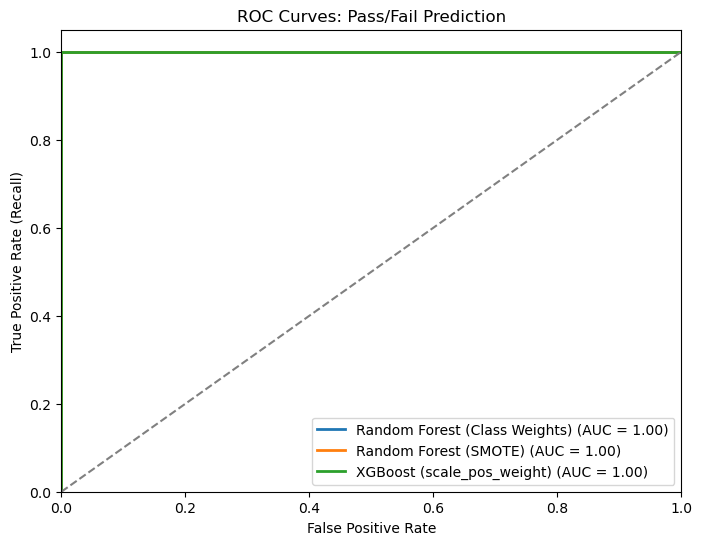

In [63]:
models = {
    "Random Forest (Class Weights)": rf,
    "Random Forest (SMOTE)": rf_smote,
    "XGBoost (scale_pos_weight)": xgb
}

plot_roc_curves(models, X_test, y_test)

#### Insights:
**1. Past Exam Scores are the Best Predictor**
- As expected, when we included each student’s average exam score, the models achieved nearly perfect accuracy.
- Random Forest and SMOTE-based models predicted every student’s Pass/Fail correctly.
- XGBoost also performed extremely well, catching all failing students but producing a few false alarms where passing students were classified as at-risk.  
**2. Why the Model is Perfect**  
- This happens because our target variable (Pass/Fail) was directly defined from average exam score (≥40 = Pass, <40 = Fail).  
- So the model doesn’t actually “predict” in the traditional sense, it just re-learns the rule we already defined.  
- This is called data leakage, because the target is directly encoded in the input.  
**3. Practical Use Case**  
- If a student has past exam history, their average exam performance is indeed the most reliable signal for whether they will pass in the future.  
- This reflects the real world: students who consistently fail are at higher risk of failing again, while strong students usually continue to perform well.  
**4. Limitation of This Approach**  
- This approach cannot help with new students (no exam history yet).  
- It also doesn’t allow early intervention before the final exam results, since the prediction depends on scores themselves.  
**5. Next Step: Risk Prediction Without Scores**  
- To address these gaps, we will now attempt a second model that excludes past exam scores and instead predicts performance risk from attendance, family background, activities, discipline, and teacher quality.  
- This approach is less precise, but it’s much more actionable for schools because it allows administrators to identify at-risk students before exams are conducted.  

#### Performance Risk Prediction Without Exam Scores

In [42]:
# Splitting the data into training and test set

X = df.drop(columns=['STUDENT_ID', 'PASS_FAIL_RATE', 'AVERAGE_SCORE'])

y = df['PASS_FAIL_RATE']

In [43]:
# Encoding categorical columns

categorical_columns = X.select_dtypes(include=['object']).columns
X[categorical_columns] = X[categorical_columns].apply(LabelEncoder().fit_transform)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
# We will handle class imbalances using two approaches - SMOTE Oversampling and Class Weights

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [46]:
# Random Forest with class weights and no SMOTE

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [47]:
# Random forest with SMOTE & no class weights

rf_smote = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf_smote.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=200, random_state=42)

In [48]:
# XGBoost with class weights

fail_weight = (len(y_train) - sum(y_train))/sum(y_train)

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=fail_weight,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
# Evaluating the model

def evaluate_model(model, X_test, y_test, model_name='Model'):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None
    
    print(f"\n===== {model_name} =====")
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\nClassification Report:\n', classification_report(y_test, y_pred, digits=4))
    
    if y_proba is not None:
        print('ROC-AUC Score:', roc_auc_score(y_test, y_proba))

In [50]:
# Evaluating Random forest with class weights

evaluate_model(rf, X_test, y_test, 'Random Forest (Class Weights)')


===== Random Forest (Class Weights) =====
Confusion Matrix:
 [[   0   39]
 [   0 1961]]

Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        39
           1     0.9805    1.0000    0.9902      1961

    accuracy                         0.9805      2000
   macro avg     0.4903    0.5000    0.4951      2000
weighted avg     0.9614    0.9805    0.9708      2000

ROC-AUC Score: 0.5235750990467971


C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
# Evaluating Random forest with SMOTE

evaluate_model(rf_smote, X_test, y_test, 'Random Forest (SMOTE)')


===== Random Forest (SMOTE) =====
Confusion Matrix:
 [[   0   39]
 [  11 1950]]

Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        39
           1     0.9804    0.9944    0.9873      1961

    accuracy                         0.9750      2000
   macro avg     0.4902    0.4972    0.4937      2000
weighted avg     0.9613    0.9750    0.9681      2000

ROC-AUC Score: 0.5750794335699996


In [37]:
# Evaluating XGBoost model

evaluate_model(xgb, X_test, y_test, 'XGBoost (scale_pos_weight)')


===== XGBoost (scale_pos_weight) =====
Confusion Matrix:
 [[   2   37]
 [  57 1904]]

Classification Report:
               precision    recall  f1-score   support

           0     0.0339    0.0513    0.0408        39
           1     0.9809    0.9709    0.9759      1961

    accuracy                         0.9530      2000
   macro avg     0.5074    0.5111    0.5084      2000
weighted avg     0.9625    0.9530    0.9577      2000

ROC-AUC Score: 0.5178807254278952


In [39]:
def plot_roc_curves(models, X_test, y_test):
    plot.figure(figsize=(8,6))
    
    for name, model in models.items():
        # Some models (like XGB) have predict_proba
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:,1]
        else:
            y_score = model.decision_function(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        
        plot.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")
    
    # Random baseline
    plot.plot([0,1], [0,1], color="gray", linestyle="--")
    
    plot.xlim([0.0, 1.0])
    plot.ylim([0.0, 1.05])
    plot.xlabel("False Positive Rate")
    plot.ylabel("True Positive Rate (Recall)")
    plot.title("ROC Curves: Pass/Fail Prediction")
    plot.legend(loc="lower right")
    plot.show()

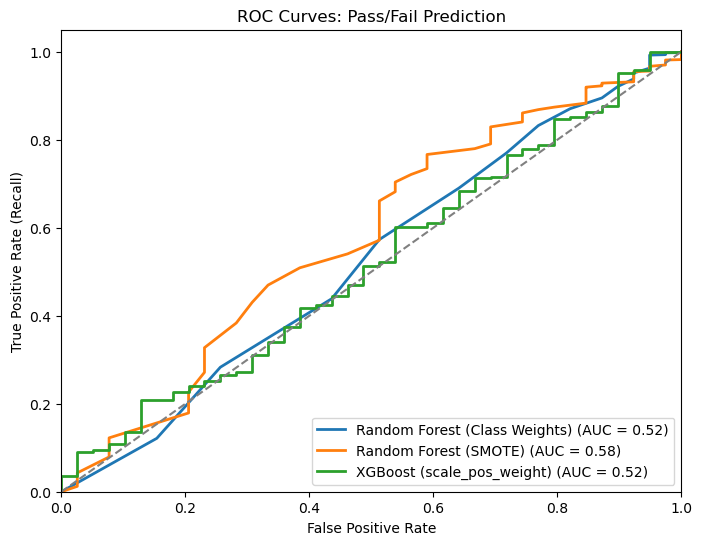

In [41]:
models = {
    "Random Forest (Class Weights)": rf,
    "Random Forest (SMOTE)": rf_smote,
    "XGBoost (scale_pos_weight)": xgb
}

plot_roc_curves(models, X_test, y_test)

### Insights:
- When we removed past exam scores, the models could no longer separate Pass vs Fail students.
- They almost always predict Pass, because that’s what the dataset overwhelmingly contains (98% passes).
- Attendance, family income, discipline, teacher ratings and activities by themselves are not strong enough predictors of failing students in this synthetic dataset.
- This explains why true negatives (failing students) were almost never caught, while true positives (passing students) were predicted correctly.  
**Why is this happening?**  
- **Severe Class Imbalance:**
- Only 2% of students are labeled as Fail.
- The models learn that predicting Pass all the time yields high accuracy (97–98%).
- **Weak Secondary Features:**
- In this synthetic data, attendance, activities, and discipline were designed with weak/no correlation to scores (based on earlier SQL analysis).
- So the models genuinely don’t have strong signals to detect failing students.
- **Target Definition Issue:**
- Since Pass/Fail is defined directly from exam scores, removing exam scores means the model is trying to guess exam outcomes without the actual signal.
- That’s why predictive power collapses.

#### Conclusion
##### With Past Scores
- Models performed perfectly because Pass/Fail is derived from exam averages.
- This proves that past performance is the strongest predictor of future performance.
- In practice: very reliable if past exam history is available.
##### Without Past Scores
- Models struggled badly — almost all fails were missed.
- Other features (attendance, activities, family, discipline, teacher quality) were not strong enough on their own to predict failure risk.
- This reflects reality: predicting failures before exams happen is much harder and needs stronger signals (continuous assessments, homework records, formative quizzes, etc.).
##### Why Hyperparameter Tuning (GridSearch/RandomizedSearch) won’t help much
- Tuning won’t fix class imbalance when there is very little signal in the features.
- At best, tuning might slightly improve precision/recall, but it won’t solve the fundamental problem of weak predictors + extreme imbalance.